In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from tabulate import tabulate
import numpy as np
import seaborn as sns
import time

C:\Users\rafae\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#imports 2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score


In [3]:
df = pd.read_csv("base_dimensionalidade.csv")
df.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
#Separando  por X e Y
X = df.drop('DEPRESSAO', axis=1)
y = df['DEPRESSAO']

In [5]:
df.head()

,SEXO,FAMILIA_MNT_RUIM,SALARIO,HORAS,ESCOLARIDADE,MORADIA,ATV_FISICA,ALCOOL,NAO_TRAB_MTV_SAUDE,CONSUMO_SAL,TRABALHA,FUMA,DEPRESSAO,IMC,PENSAMENTOS_NEGATIVOS,CARNES,ALIMENTOS_PREJUDICIAIS,ALIMENTOS_SAUDAVEIS,ESTADO_SAUDE,CONSULTA_MEDICA
0,2.0,0.0,2000.0,20,12,1.0,2.0,1.0,1.0,4.0,2.0,3.0,1.0,31.955923,4.0,0.0,0.0,0.0,4.0,1.0
1,2.0,3.0,2000.0,30,10,1.0,1.0,1.0,2.0,4.0,2.0,3.0,1.0,25.970116,1.0,1.0,0.0,7.0,1.0,1.0
2,2.0,3.0,3001.0,48,12,2.0,1.0,3.0,2.0,4.0,1.0,3.0,1.0,24.444444,1.0,4.0,0.0,0.0,2.0,1.0
3,2.0,3.0,2000.0,40,10,1.0,2.0,3.0,2.0,2.0,2.0,3.0,1.0,24.386526,1.0,0.0,2.0,3.0,2.0,1.0
4,2.0,3.0,2250.0,30,12,1.0,2.0,1.0,2.0,3.0,1.0,3.0,1.0,24.840980,2.0,3.0,0.0,1.0,2.0,1.0


In [6]:
y.value_counts()

DEPRESSAO
2.0    2054
1.0    2031
Name: count, dtype: int64

In [7]:
#Separando por modelo de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=590, 
                                                    random_state=42, stratify=y)

In [8]:
X_train.shape

(3495, 19)

### INICIANDO MODELAGEM

In [9]:
#testando modelo antes do balanceamento
#Iremos comparar o precision e o recall antes e depois do balanceamento, para sabermos se deu certo
#importando modelo}
from sklearn.tree import DecisionTreeClassifier
#defininfo classificador
clf = DecisionTreeClassifier(criterion='gini', max_depth=3)
#Fazendo Fit com os dados
clf = clf.fit(X_train, y_train)

In [22]:
y_pred_treino = clf.predict(X_train)

In [10]:
#prev do resultado
y_pred = clf.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score
accuracy_bf = accuracy_score(y_test, y_pred)

print("Acurácia do modelo de Arvore de decisão:", accuracy_bf)

Acurácia do modelo de Arvore de decisão: 0.8271186440677966


In [12]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred)

0.7675070028011205

In [13]:
from sklearn.metrics import recall_score
#verificando recall
recall_score(y_test,y_pred)

0.9351535836177475

In [14]:
from sklearn.metrics import confusion_matrix
#gerando matriz de confusão
confusion_matrix(y_test,y_pred)

array([[274,  19],
       [ 83, 214]], dtype=int64)

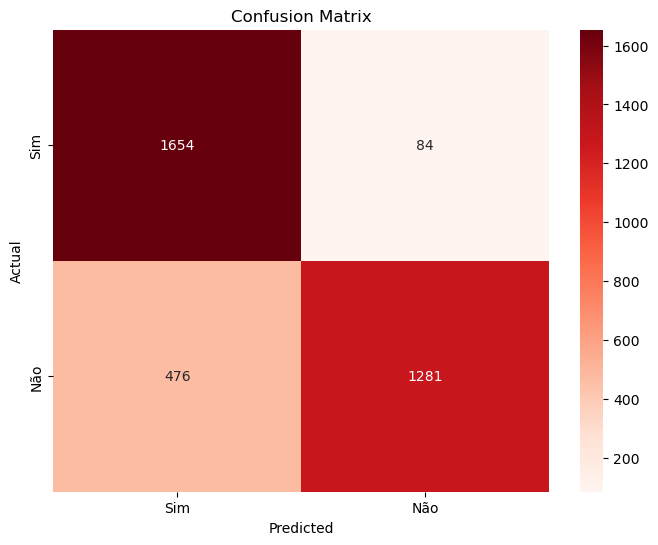

In [24]:
# Calculando a matriz de confusão
cm = confusion_matrix(y_train, y_pred_treino)

# Plotando a matriz de confusão como um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g', xticklabels=['Sim', 'Não'], 
            yticklabels=['Sim', 'Não']) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

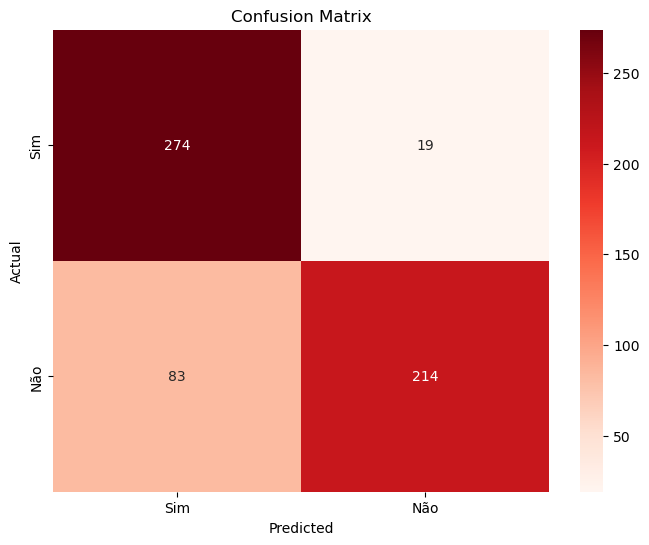

In [15]:
# Calculando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotando a matriz de confusão como um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g', xticklabels=['Sim', 'Não'], 
            yticklabels=['Sim', 'Não']) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.77      0.94      0.84       293
         2.0       0.92      0.72      0.81       297

    accuracy                           0.83       590
   macro avg       0.84      0.83      0.83       590
weighted avg       0.84      0.83      0.83       590



In [27]:
#MODELO DE TREINO
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_train, y_pred_treino))

              precision    recall  f1-score   support

         1.0       0.78      0.95      0.86      1738
         2.0       0.94      0.73      0.82      1757

    accuracy                           0.84      3495
   macro avg       0.86      0.84      0.84      3495
weighted avg       0.86      0.84      0.84      3495



### RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [ ]:
X_train.shape

(3495, 19)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=30, max_depth=5, max_features="sqrt")
rf = rf.fit(X_train, y_train)

In [ ]:
y_predRF = rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_bf = accuracy_score(y_test, y_predRF)

print("Acurácia do modelo de Random Forest:", accuracy_bf)

Acurácia do modelo de Random Forest: 0.8389830508474576


In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test,y_predRF)

0.7928994082840237

In [ ]:
from sklearn.metrics import recall_score
#verificando recall
recall_score(y_test,y_predRF)

0.9146757679180887

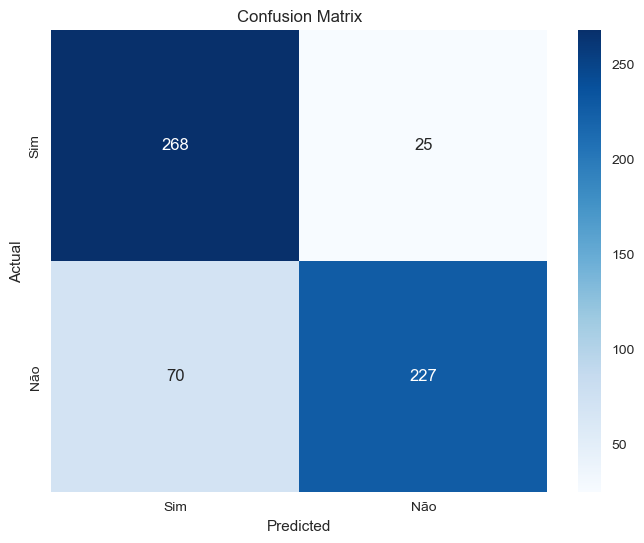

In [ ]:
# Calculando a matriz de confusão
cm = confusion_matrix(y_test, y_predRF)

# Plotando a matriz de confusão como um heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Sim', 'Não'], 
            yticklabels=['Sim', 'Não']) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test, y_predRF))

              precision    recall  f1-score   support

         1.0       0.79      0.91      0.85       293
         2.0       0.90      0.76      0.83       297

    accuracy                           0.84       590
   macro avg       0.85      0.84      0.84       590
weighted avg       0.85      0.84      0.84       590



### NAIVE

In [ ]:
from sklearn.naive_bayes import GaussianNB
modelo = GaussianNB()

In [ ]:
modelo.fit(X_train, y_train)

GaussianNB()

In [ ]:
previsoes = modelo.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test,previsoes)

0.7983050847457627

In [ ]:
precision_score(y_test,previsoes)

0.8246268656716418

In [ ]:
recall_score(y_test,previsoes)

0.7542662116040956

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_test, previsoes)

array([[221,  72],
       [ 47, 250]], dtype=int64)

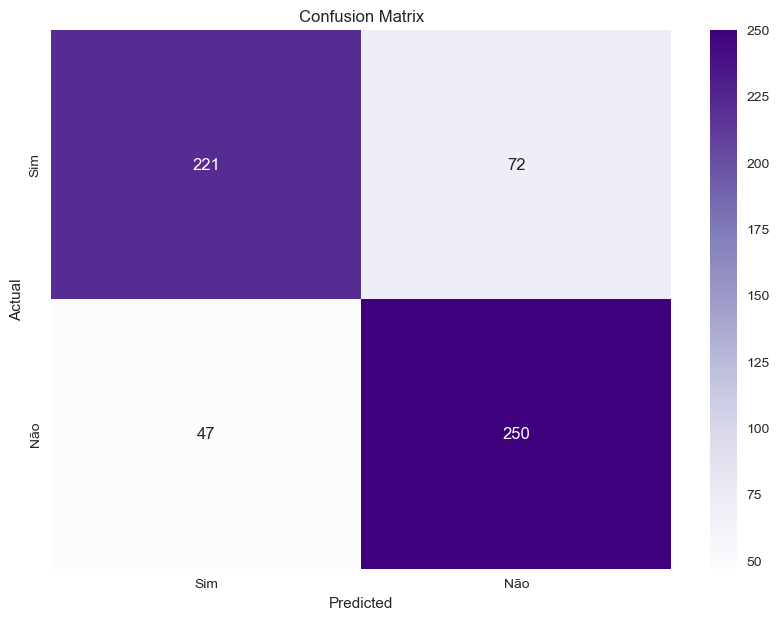

In [ ]:
# Cálculo da matriz de confusão
cm = confusion_matrix(y_test, previsoes)

# Plotando a matriz de confusão com a cor roxa
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='Purples', fmt='g', xticklabels=['Sim', 'Não'], 
            yticklabels=['Sim', 'Não']) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

         1.0       0.82      0.75      0.79       293
         2.0       0.78      0.84      0.81       297

    accuracy                           0.80       590
   macro avg       0.80      0.80      0.80       590
weighted avg       0.80      0.80      0.80       590



## Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
scoresAD = cross_val_score(clf, X_train, y_train, cv=kf)
scoresRF = cross_val_score(rf, X_train, y_train, cv=kf)
scoresNY = cross_val_score(modelo, X_train, y_train, cv=kf)
print("Acurácia média da Árvore:\n", scoresAD, scoresAD.mean(), "+-", scoresAD.std())
print("\nAcurácia média do RF:\n", scoresRF, scoresRF.mean(), "+-", scoresRF.std())
print("\nAcurácia média do Naive:\n", scoresNY, scoresNY.mean(), "+-", scoresNY.std())

Acurácia média da Árvore:
 [0.83428571 0.83428571 0.82571429 0.84285714 0.83428571 0.83381089
 0.85673352 0.85100287 0.85100287 0.81948424] 0.8383462955382728 +- 0.01124364313655493

Acurácia média do RF:
 [0.83142857 0.84285714 0.82285714 0.84       0.84       0.83381089
 0.84813754 0.84240688 0.85959885 0.82234957] 0.8383446582071225 +- 0.010742807053563303

Acurácia média do Naive:
 [0.81142857 0.79428571 0.82857143 0.80285714 0.84285714 0.83094556
 0.81088825 0.81661891 0.83954155 0.84240688] 0.8220401146131806 +- 0.016373974116760098


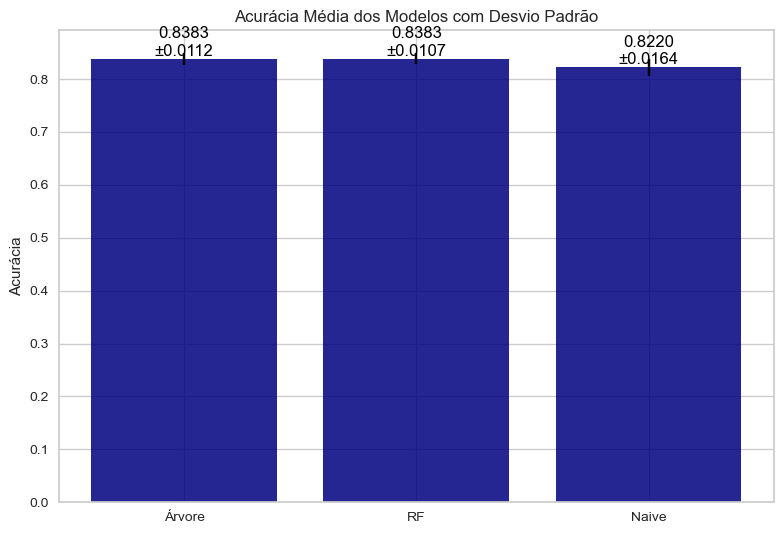

In [ ]:
# Calculando as médias e os desvios padrões
models = ['Árvore', 'RF', 'Naive']  # Nomes dos modelos
scores = [scoresAD, scoresRF, scoresNY]
means = [score.mean() for score in scores]  # Média das acurácias
stds = [score.std() for score in scores]  # Desvio padrão das acurácias

# Criando o gráfico de barras
x_pos = np.arange(len(models))  # Posições no eixo x

fig, ax = plt.subplots()

# Barras de erro com cor azul escuro
bars = ax.bar(x_pos, means, yerr=stds, align='center', alpha=0.85, ecolor='black', capsize=10, color='navy')
ax.set_ylabel('Acurácia')  # Rótulo do eixo y
ax.set_xticks(x_pos)  # Posições no eixo x
ax.set_xticklabels(models)  # Nomes dos modelos como etiquetas no eixo x
ax.set_title('Acurácia Média dos Modelos com Desvio Padrão')  # Título do gráfico
ax.yaxis.grid(True)  # Adiciona uma grade no eixo y

# Adicionando legendas nas barras
for bar, mean, std in zip(bars, means, stds):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval, f'{mean:.4f}\n±{std:.4f}', ha='center', va='bottom', color='black')

# Ajustando o layout para exibir o gráfico corretamente
plt.tight_layout()
plt.show()